Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 7.2 MB/s eta 0:00:00:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openxlab 0.0.38 requires setuptools~=60.2.0, but you have setuptools 69.5.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 25.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1


In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

## AutoGluon Classifier

In [4]:
# Load in the wine dataset
wine = datasets.load_wine()

In [5]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Include the target as well
df['target'] = wine.target

In [6]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df,test_size=0.2,random_state=0)

In [7]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label='target').fit(train_data=df_train,time_limit=120,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240421_122938"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 120 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240421_122938/ds_sub_fit/sub_fit_ho.
/opt/conda/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDepend

In [8]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetFastAI_BAG_L1   0.985915    accuracy       0.113118  38.060283                0.113118          38.060283            1       True          3
1     WeightedEnsemble_L3   0.985915    accuracy       0.114003  38.119434                0.000885           0.059150            3       True          6
2     WeightedEnsemble_L2   0.985915    accuracy       0.114039  38.109140                0.000921           0.048857            2       True          4
3  NeuralNetFastAI_BAG_L2   0.978873    accuracy       0.291381  73.050952                0.145882          34.974968            2       True          5
4   KNeighborsDist_BAG_L1   0.711268    accuracy       0.015350   0.008907                0.015350           0.008907            1       True          2
5   KNeighborsUnif_B

/opt/conda/lib/python3.8/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6619718309859155,
  'KNeighborsDist_BAG_L1': 0.7112676056338029,
  'NeuralNetFastAI_BAG_L1': 0.9859154929577465,
  'WeightedEnsemble_L2': 0.9859154929577465,
  'NeuralNetFastAI_BAG_L2': 0.9788732394366197,
  'WeightedEnsemble_L3': 0.9859154929577465},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'NeuralNetFastAI_BAG_L1': ['NeuralNetFastAI_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'NeuralNetFastAI_BAG_L2': ['NeuralNetFastAI_BAG_L2'],
  'WeightedEn

<Axes: xlabel='model'>

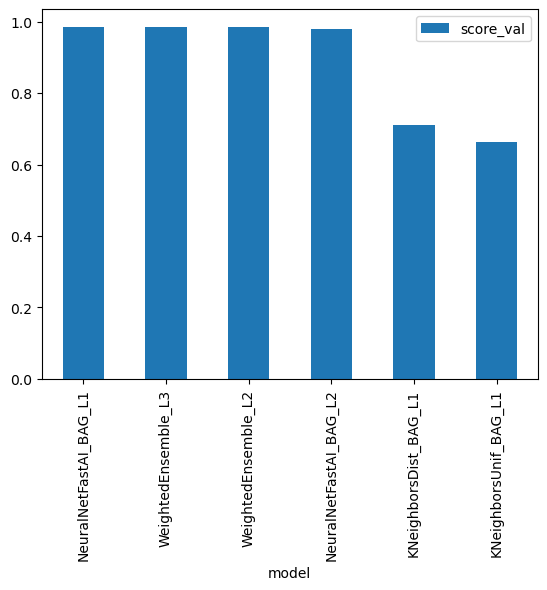

In [9]:
predictor.leaderboard(silent=True).plot(kind='bar',x='model',y='score_val')

In [10]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)
print(performance)

{'accuracy': 1.0, 'balanced_accuracy': 1.0, 'mcc': 1.0}


## AutoGluon Regression

In [11]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [12]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Include the target as well
dfd['target'] = diabetes.target

In [13]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd,test_size=0.2,random_state=0)

In [14]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a regression, autogluon will pick it up
predictor = TabularPredictor(label='target',eval_metric = 'r2').fit(train_data=dfd_train,presets='best_quality',time_limit=120)

No path specified. Models will be saved in: "AutogluonModels/ag-20240421_123208"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 120 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240421_123208/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 57 seconds 

In [15]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3   0.534052          r2       0.096904  61.362347                0.003896           0.083221            3       True          7
1    WeightedEnsemble_L2   0.532749          r2       0.047320  40.083750                0.000947           0.075514            2       True          5
2      LightGBMXT_BAG_L1   0.530845          r2       0.016637  19.865592                0.016637          19.865592            1       True          3
3      LightGBMXT_BAG_L2   0.517343          r2       0.093008  61.279126                0.023757          21.262975            2       True          6
4        LightGBM_BAG_L1   0.495653          r2       0.012464  20.135637                0.012464          20.135637            1       True          4
5  KNeighborsDist_BAG_L1  

/opt/conda/lib/python3.8/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.43052099899418794,
  'KNeighborsDist_BAG_L1': 0.4397005764934093,
  'LightGBMXT_BAG_L1': 0.5308451089941344,
  'LightGBM_BAG_L1': 0.4956533619566885,
  'WeightedEnsemble_L2': 0.5327486348846964,
  'LightGBMXT_BAG_L2': 0.5173425927913655,
  'WeightedEnsemble_L3': 0.5340516050468029},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
  'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsem

In [16]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)

<Axes: xlabel='model'>

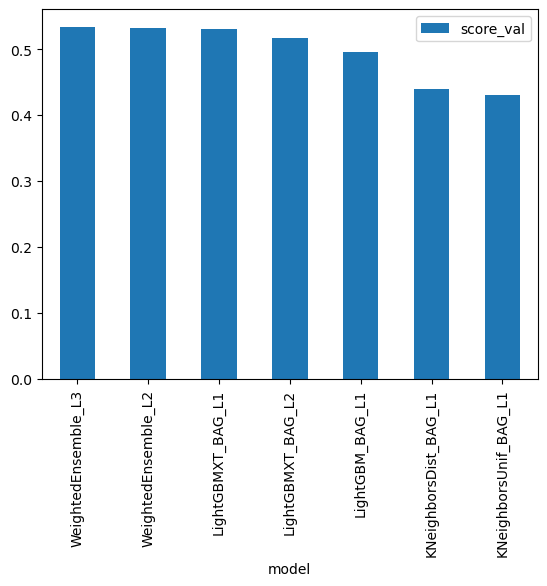

In [17]:
predictor.leaderboard(silent=True).plot(kind='bar',x='model',y='score_val')

Linear Models
Linear models are well known, and usually the first model type practitioners use for new problems. It's a great way to create a baseline model to which all future models can be compared to.

Random Forests
Random forests, a tree-based model, are very robust. It provides a good solution to throw data at in order to see what kind of model is created. When compared to XGBoost, the available parameters are less complicated, making it a better choice when first starting on new data.

XGBoost
XGBoost is very powerful, often so powerful that it's hard to tune in order to achieve optimal performance. With enough experience in how to tune its parameters efficiently, it can be a default option to apply to problems.

AutoGluon
AutoGluon is the new era in prototyping a model for new problems. It intelligently tries different models and parameters automatically. It allows you to quickly iterate on new data and get future ideas to optimize a model.

Sagemaker Jumpstart
Sagemaker Jumpstart provides solutions to typical problems in a nontechnical way. And since Sagemaker is a complete infrastructure surrounding the cloud ML space, Jumpstart is a great option when maintaining the entire ML lifecycle internally.

